<a href="https://colab.research.google.com/github/YCCS-Summer-2023-DDNMA/project/blob/plotting-2-d-image-joseph/Joseph_Couzens/notebooks/Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install distrax

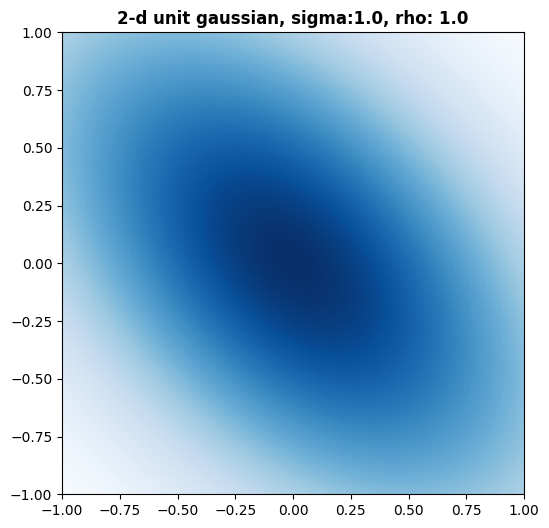

In [19]:
# plot a 2-d unit gaussion

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import itertools
from functools import partial
from IPython.display import HTML

fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6))

# create the x, y grid from (-1, 1) x (-1,1)

dx, dy = 0.01, 0.01
y, x = np.mgrid[slice(-1, 1 + dy, dy),
				slice(-1, 1 + dx, dx)]

def get_z(sigma, rho):
  z = np.exp((-(x ** 2 + y ** 2 + rho*x*y))/sigma)
  return z

fixed_sigma_getZ = partial(get_z, 1.0)

# sigma is in (0,1) and rho is in (-1,1)
def init():
  #sigma = 1.0
  rho = -1.0
  z = fixed_sigma_getZ(rho)
  c = axs.imshow(z, cmap ='Blues', vmin = z.min(), vmax = z.max(),
				extent =[x.min(), x.max(), y.min(), y.max()],
					interpolation ='nearest', origin ='lower')

  axs.set_title(f"2-d unit gaussian, sigma:{1.0}, rho: {rho}",
									fontweight ="bold")
  #fig.colorbar(c)
  return (c,)

def update(frame):
  rho = -1.0 + frame/10
  z = fixed_sigma_getZ(rho)
  c = axs.imshow(z, cmap ='Blues', vmin = z.min(), vmax = z.max(),
				extent =[x.min(), x.max(), y.min(), y.max()],
					interpolation ='nearest', origin ='lower')

  axs.set_title(f"2-d unit gaussian, sigma:{1.0}, rho: {rho}",
									fontweight ="bold")
  #fig.colorbar(c)
  return (c,)

# z is the unit 2-d gaussian
anim = animation.FuncAnimation(fig, update, frames=21, init_func=init, blit=True)
#plt.show()

HTML(anim.to_jshtml())
